### Project Proposal for COVID19 prediction

##### Section 1: Questions to Answer
1. Why is your proposal important in today’s world? How can predicting a disease accurately improve medical treatment?

- Early Intervention: Predictive models can help identify potential hotspots and outbreaks before they occur. This allows for early intervention measures such as quarantine, testing, and resource allocation, which can significantly reduce the spread of the disease.

- Resource Allocation: Accurate predictions enable healthcare systems to allocate resources more efficiently. Hospitals can prepare for surges in patients, secure an adequate supply of medical equipment and pharmaceuticals, and deploy healthcare workers where they are needed most.


2. How is it going to impact the medical field when it comes to effective screening and reducing the healthcare burden?

  - Reducing Healthcare Burden: By predicting disease trends and identifying vulnerable populations, healthcare systems can better plan for surges in patient numbers. This reduces the strain on hospitals, ensuring that resources and personnel are available to provide adequate care.

  - Cost Reduction: Accurate predictions can lead to cost savings by optimizing resource allocation, reducing unnecessary hospitalizations, and preventing outbreaks. This is especially important for reducing the financial burden on healthcare systems.

3. If any, what is the gap in knowledge or how can your proposed method be helpful if required in the future for any other 
disease.

  - Data Availability: Data quality and availability are common challenges. For future diseases, access to timely and accurate data will be critical.

  - Transferable Knowledge: The methodology developed for COVID-19 prediction can serve as a template for predicting other infectious diseases. The data collection, feature selection, and modeling techniques can be adapted to address new health challenges.

Section 2: Initial Hypothesis (or Hypotheses)

Data Analysis (DA) Hypotheses:

- Data Quality: The COVID-19 data might have missing values, outliers, and inconsistencies due to the decentralized nature of data collection. Addressing these data quality issues will be essential for accurate analysis.

- Temporal Patterns: Temporal patterns in the data, with spikes in cases during specific periods such as winter months or following major events (e.g., holidays or large gatherings).

- Geographical Variations: There will be significant geographical variations in COVID-19 data. Some regions may have higher infection rates than others due to population density, healthcare infrastructure, and public health measures.

Machine learning (ML) hypotheses:

- Feature Importance: Features like age, comorbidities, population density, and vaccination rates will be important for predicting COVID-19 outcomes, such as infection rates or hospitalizations.

- Model Performance: Choose the model that performs better based on relevant evaluation metrics.

- Model Evaluation: Decision tree and random forest models will be evaluated using metrics like  mean absolute error (MAE) and mean squared error (MSE) for classification tasks. Hypothesis: Random forest, being an ensemble model, will provide more robust and accurate predictions than individual decision trees.

- Overfitting Mitigation: Random forest, as an ensemble of decision trees, can help mitigate overfitting. Hypothesis: Random forest models will outperform single decision trees by reducing overfitting and providing more stable and reliable predictions.

Section 3: Data Analysis Approach
1. What approach are you going to take in order to prove or disprove your hypothesis?

    - In order to improve data quality, it is necessary to eliminate all outliers and missing values.
    
    - Temporary patterns can be detected by employing a vizulation approach.
    
    - Feature importance: By using techniques like chi squared, anova test, and correlation.
    
    - EDA: By implementing all the basic EDA approaches.


- parametric model 
    - liner regression
    - logistic regression
- non parametric model
    - Decesion tree
    - random forest tree

### Libery Requried

In [673]:
# Importing all the necessary libraries.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

In [674]:
os.listdir()

['2223291-bank-term-deposit.xlsx',
 'Assignement_1.ipynb',
 'Book1.xlsx',
 'Capstone Project.ipynb',
 'capston_project.ipynb',
 'corona_tested_006.csv',
 'customer_churn_dataset.csv',
 'day_2_week_2_linreg (1).ipynb',
 'day_2_week_2_lrg (1).ipynb',
 'diabetes.csv',
 'health care diabetes.csv',
 'healthcare appointment data.csv',
 'housing_dataset.csv',
 'income.csv',
 'iris',
 'iris.pdf',
 'iris_dec.text',
 'iris_st.pdf',
 'iris_st.text',
 'iris_st.text.pdf',
 'kc_house_data.csv',
 'ML 2.ipynb',
 'ML-3-1.ipynb',
 'ML.ipynb',
 'ML101 Dataset_1 German_Credit.xlsx',
 'ML101 Dataset_2 penguin_manipulated_data_set.xlsx',
 'ML101 Dataset_3 kc_house_data.xlsx',
 'ML101 Dataset_4 diabetes.xlsx',
 'ML101 dataset_5 Data.xlsx',
 'ML101 Dataset_6 USA_Housing.xlsx',
 'ML101 Dataset_7 User_data.xlsx',
 'ML101 Dataset_8 Mall_Customers.xlsx',
 'ML_practice.ipynb',
 'Pumping.Simulator.2.v0.1.5.zip',
 'unsupervised_learning_cluster.ipynb',
 'w2-d2.ipynb',
 'Week_1_task.ipynb']

### Performing EDA

In [834]:
data = pd.read_csv('corona_tested_006.csv')
data.sample(5)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11728\1435803009.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
97713,97714,05-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
262389,262390,28-04-2020,False,False,False,False,False,negative,None,female,Other
165934,165935,16-04-2020,False,False,False,False,False,negative,None,female,Other
213599,213600,21-04-2020,False,False,False,False,False,negative,None,female,Other
158733,158734,15-04-2020,False,False,False,False,False,negative,None,male,Other


##### Data Summary

In [676]:
data.shape

(278848, 11)

In [677]:
# Createing Duplicate data frame 
df = data

In [678]:
# getting the all the infromation of datatype of each columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [679]:
df.shape

(278848, 11)

##### Data Cleaning

In [680]:
# droping unwanted columns which are not requried
df.drop(['Ind_ID','Test_date','Known_contact'],axis=1,inplace=True)
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None
3,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None


In [681]:
# finding null values
df.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
dtype: int64

In [682]:
# finding unique record from each columns 
for i in df:
    print(i,df[i].unique())

Cough_symptoms ['TRUE' 'FALSE' 'None' False True]
Fever ['FALSE' 'TRUE' 'None' False True]
Sore_throat ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath ['FALSE' 'TRUE' 'None' False True]
Headache ['FALSE' 'TRUE' 'None' False True]
Corona ['negative' 'positive' 'other']
Age_60_above ['None' 'No' 'Yes']
Sex ['None' 'male' 'female']


In [683]:
df.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex'],
      dtype='object')

In [684]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [685]:
# Category data contains inconsistent data, I need to clean the dataset by correcting or removing the problematic entries.
columns_to_classify = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Sex','Age_60_above']
for i in df:
    if i in columns_to_classify:
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: x.lower() if isinstance(x, str) else x)
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: 'true' if x==True else x)
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: 'false' if x==False else x)
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: np.nan if x=='none' else x)

In [686]:
for i in df:
    print(i,":",df[i].unique())

Cough_symptoms : ['true' 'false' nan]
Fever : ['false' 'true' nan]
Sore_throat : ['true' 'false' nan]
Shortness_of_breath : ['false' 'true' nan]
Headache : ['false' 'true' nan]
Corona : ['negative' 'positive' 'other']
Age_60_above : [nan 'no' 'yes']
Sex : [nan 'male' 'female']


In [687]:
# replacing all the nan value with the mode value 
df['Cough_symptoms']=df['Cough_symptoms'].replace(np.nan,df['Cough_symptoms'].mode()[0])
df['Fever']=df['Fever'].replace(np.nan,df['Fever'].mode()[0])
df['Sore_throat']=df['Sore_throat'].replace(np.nan,df['Sore_throat'].mode()[0])
df['Shortness_of_breath']=df['Shortness_of_breath'].replace(np.nan,df['Shortness_of_breath'].mode()[0])
df['Headache']=df['Headache'].replace(np.nan,df['Headache'].mode()[0])
df['Sex']=df['Sex'].replace(np.nan,df['Sex'].mode()[0])
df['Age_60_above']=df['Age_60_above'].replace(np.nan,df['Age_60_above'].mode()[0])

In [688]:
for i in df:
    print(i,df[i].unique())

Cough_symptoms ['true' 'false']
Fever ['false' 'true']
Sore_throat ['true' 'false']
Shortness_of_breath ['false' 'true']
Headache ['false' 'true']
Corona ['negative' 'positive' 'other']
Age_60_above ['no' 'yes']
Sex ['female' 'male']


##### Univariate analysis

In [689]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,false,true,false,false,negative,no,female
1,false,true,false,false,false,positive,no,female
2,false,true,false,false,false,positive,no,female
3,true,false,false,false,false,negative,no,female
4,true,false,false,false,false,negative,no,female


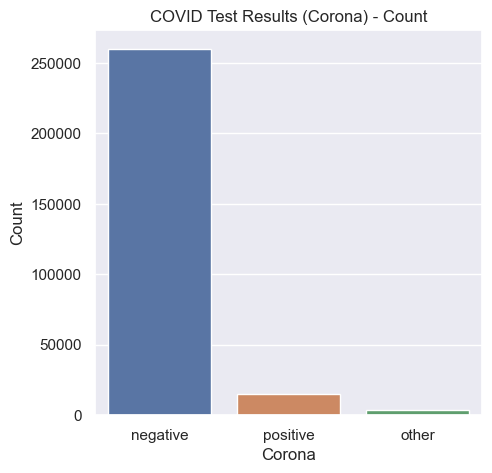

In [690]:
# Set the title and figure size before creating the countplot
plt.figure(figsize=(5,5))
plt.title('COVID Test Results (Corona) - Count')

# Create the countplot
sns.countplot(data=df, x='Corona')

# Set labels for the x-axis and y-axis
plt.xlabel('Corona')
plt.ylabel('Count')

# Show the plot
plt.show()

- The "Corona" column contains three categories: "positive" , "negative" and "other".
- The countplot displays the number of occurrences of each category.
- It appears that there are more occurrences of "negative" than "positive" and "other".

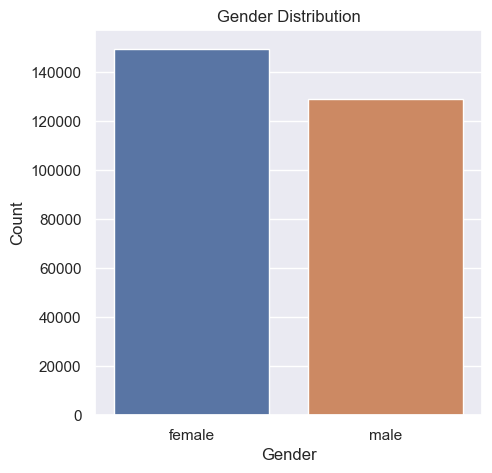

In [691]:
# Set the title and figure size before creating the countplot
plt.figure(figsize=(5,5))
plt.title('Gender Distribution')

# Create the countplot
sns.countplot(data=df, x='Sex')

# Set labels for the x-axis and y-axis
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

- The "Sex" column contains two categories: "female" , "male".
- As per this data i can see that there are more number of female than male gender.

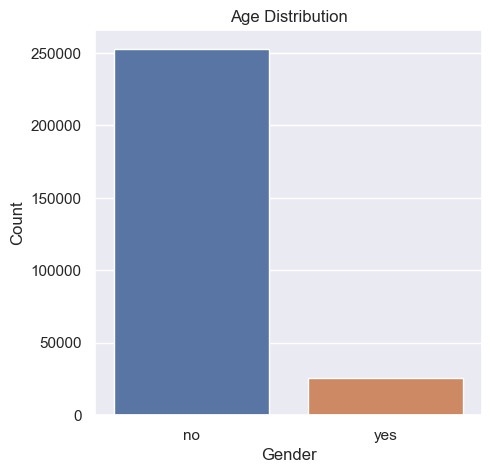

In [692]:
# Set the title and figure size before creating the countplot
plt.figure(figsize=(5, 5))
plt.title('Age Distribution')

# Create the countplot
sns.countplot(data=df, x='Age_60_above')

# Set labels for the x-axis and y-axis
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

- In this column we have two category "no" and "yes"
- If the age is "no" that means people having less than 60 years
- If the age is "yes" that means people having age >= 60 years
- we have more people who less than 60 years old 

##### Bivariate analysis

In [693]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,false,true,false,false,negative,no,female
1,false,true,false,false,false,positive,no,female
2,false,true,false,false,false,positive,no,female
3,true,false,false,false,false,negative,no,female
4,true,false,false,false,false,negative,no,female


<Axes: xlabel='Sex', ylabel='count'>

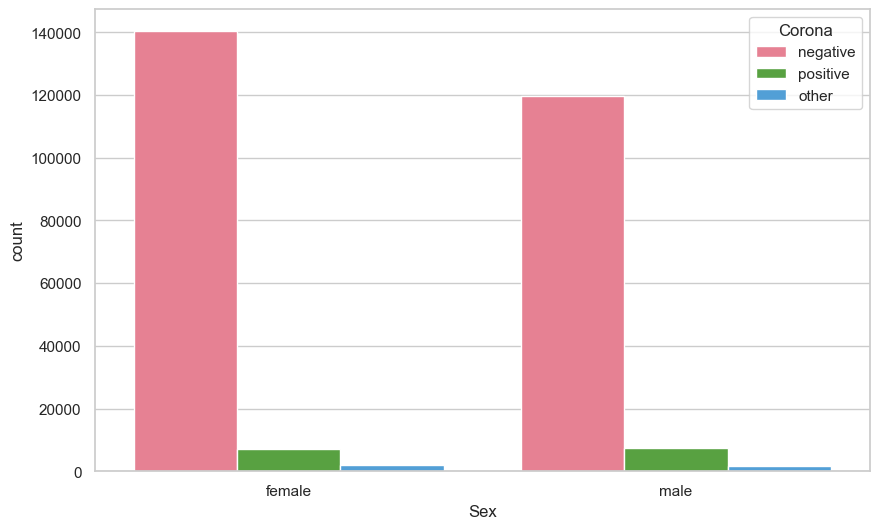

In [694]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Corona',palette='husl')

##### Hypothesis Testing

In [695]:
# H0 = "Null Hypothsis" there is no relationship between Corona and Sex
# H1 = "Alternative Hypothsis" there is relationship between Corona and Sex

In [696]:
contingency_table = pd.crosstab(df['Corona'],df['Sex'])
contingency_table

Sex,female,male
Corona,,
negative,140376,119851
other,2135,1757
positive,7210,7519


Gender Distribution:
- The table shows that there are more females in the dataset compared to males.
- The majority of individuals in the dataset are female, regardless of their "Corona" status.

"Corona" Status Distribution:
- The table provides counts of individuals in each "Corona" status category: "negative," "other," and "positive."
- The "negative" category has the highest count, followed by "positive," and then "other."

Relationship Between "Corona" Status and Gender:
- In the "negative" category, there are more females than males.
- In the "other" category, there are more females than males as well.
- In the "positive" category, there are more males than females.


##### To calcualte Expected value = (row total * column total)/gand total 
##### To calcualte chi-squre value = sum(observed - expected value)^2 / sum(expected value)
##### To calcualte dof = (no of rows -1) * (no of column -1)

In [697]:
observed_value = contingency_table.values
observed_value

array([[140376, 119851],
       [  2135,   1757],
       [  7210,   7519]], dtype=int64)

In [698]:
chi2, p, dof,excepted = chi2_contingency(observed_value)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}") 
print(f"Degrees of Freedom: {dof}")
print("Expected Values:")
print(excepted)

Chi-Square Statistic: 141.89987843019287
P-Value: 1.5375629573328895e-31
Degrees of Freedom: 2
Expected Values:
[[139722.88367498 120504.11632502]
 [  2089.71960351   1802.28039649]
 [  7908.39672151   6820.60327849]]


Chi-Square Test Result:
- A chi-squared test for independence on this contingency table has resulted in an extremely low p-value (virtually zero).
- The small p-value suggests a highly significant association between "Sex" and "Corona" status.

Based on these observations and the chi-squared test result, we can conclude that there is a significant association between "Sex" and "Corona" status in your dataset. This means that the two categorical variables are not independent, and there is evidence of a relationship or association between them.

In [699]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,false,true,false,false,negative,no,female
1,false,true,false,false,false,positive,no,female
2,false,true,false,false,false,positive,no,female
3,true,false,false,false,false,negative,no,female
4,true,false,false,false,false,negative,no,female


### ML Model

In [700]:
# Improting all the nessary libery
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,classification_report

##### Doing some basic cleaning

In [701]:
df1=df.copy()
df1.sample(10)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
180199,false,false,false,false,false,negative,no,female
206355,false,false,false,false,false,negative,no,female
103110,true,false,false,false,false,negative,no,female
271391,true,false,false,false,false,negative,no,male
6231,false,false,false,false,false,negative,no,female
221130,true,true,false,false,false,negative,no,male
268425,false,false,false,false,false,negative,no,male
191345,false,false,false,false,false,negative,no,female
148755,false,false,false,false,false,negative,no,female
108864,false,false,false,false,false,negative,no,male


In [702]:
# In order to find the wether a person is suffering from covid or not we might only requried the positive and negative 

df1_filter = df[df['Corona']!='other']

In [703]:
df1_filter.shape

(274956, 8)

In [704]:
# finding any null values in a dataset
df1_filter.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
dtype: int64

In [705]:
# finding uniqe values in each column
for i in df1_filter:
    print(i,":",df1_filter[i].unique())

Cough_symptoms : ['true' 'false']
Fever : ['false' 'true']
Sore_throat : ['true' 'false']
Shortness_of_breath : ['false' 'true']
Headache : ['false' 'true']
Corona : ['negative' 'positive']
Age_60_above : ['no' 'yes']
Sex : ['female' 'male']


In [706]:
df1_filter.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,false,true,false,false,negative,no,female
1,false,true,false,false,false,positive,no,female
2,false,true,false,false,false,positive,no,female
3,true,false,false,false,false,negative,no,female
4,true,false,false,false,false,negative,no,female


In [707]:
target = df1_filter['Corona']

In [708]:
df1_filter.drop('Corona',axis=1,inplace=True)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11728\2185062142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filter.drop('Corona',axis=1,inplace=True)


In [709]:
df1_filter.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex
0,true,false,true,false,false,no,female
1,false,true,false,false,false,no,female
2,false,true,false,false,false,no,female
3,true,false,false,false,false,no,female
4,true,false,false,false,false,no,female


In [710]:
df1_filter = pd.concat([df1_filter,target],axis=1)

In [711]:
df1_filter

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Corona
0,true,false,true,false,false,no,female,negative
1,false,true,false,false,false,no,female,positive
2,false,true,false,false,false,no,female,positive
3,true,false,false,false,false,no,female,negative
4,true,false,false,false,false,no,female,negative
...,...,...,...,...,...,...,...,...
278843,false,false,false,false,false,no,male,positive
278844,false,false,false,false,false,no,female,negative
278845,false,false,false,false,false,no,male,negative
278846,false,false,false,false,false,no,male,negative


##### Performing lable encoding for each independent column 

In [712]:
df1_filter.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex', 'Corona'],
      dtype='object')

In [713]:
x = df1_filter[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex']]
y = df1_filter['Corona']

In [714]:
column = df1_filter[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex','Corona']]

In [715]:
lable  = LabelEncoder()
for i in column:
    df1_filter[i] = lable.fit_transform(df1_filter[i])

In [716]:
x = df1_filter[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex']]
y = df1_filter['Corona']

In [717]:
df1_filter.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Corona
0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [718]:
df1_filter.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Corona
Cough_symptoms,1.000000,0.453825,0.115436,0.106183,0.116726,-0.007256,0.032672,0.196456
Fever,0.453825,1.000000,0.122067,0.125687,0.169507,0.016198,0.032940,0.266268
Sore_throat,0.115436,0.122067,1.000000,0.195943,0.323043,0.004412,-0.016715,0.278365
Shortness_of_breath,0.106183,0.125687,0.195943,1.000000,0.202658,0.024115,-0.013989,0.233295
Headache,0.116726,0.169507,0.323043,0.202658,1.000000,0.008756,-0.002431,0.367225
Age_60_above,-0.007256,0.016198,0.004412,0.024115,0.008756,1.000000,-0.016462,0.046949
Sex,0.032672,0.032940,-0.016715,-0.013989,-0.002431,-0.016462,1.000000,0.022544
Corona,0.196456,0.266268,0.278365,0.233295,0.367225,0.046949,0.022544,1.000000


In [719]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.432118
         Iterations 7
                           Results: Logit
Model:               Logit             Method:            MLE        
Dependent Variable:  Corona            Pseudo R-squared:  -1.069     
Date:                2023-11-28 12:04  AIC:               237640.9698
No. Observations:    274956            BIC:               237714.6404
Df Model:            6                 Log-Likelihood:    -1.1881e+05
Df Residuals:        274949            LL-Null:           -57436.    
Converged:           1.0000            LLR p-value:       1.0000     
No. Iterations:      7.0000            Scale:             1.0000     
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Cough_symptoms      -1.3787   0.0192  -71.8047 0.0000 -1.4163 -1.3410
Fever           

In [720]:
x = df1_filter[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex']]
y = df1_filter['Corona']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [721]:
# LogisticRegression Model
lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [722]:
# DecisionTreeClassifier Model
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [723]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [724]:
# EGboostclasifier 
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [725]:
print(f"Logistic regression model: {lr.score(x_test,y_test)}%")
print(f"Decision Tree model: {dt.score(x_test,y_test)}%")
print(f"Random Forest model: {rf.score(x_test,y_test)}%")
print(f"XGBClassifier model: {xgb.score(x_test,y_test)}%")

Logistic regression model: 0.9575029095141111%
Decision Tree model: 0.958539423916206%
Random Forest model: 0.958539423916206%
XGBClassifier model: 0.958539423916206%


In [726]:
# Now in order to select the best model we can perform Kfold cross validation technique

def get_score(model,x_train,x_test,y_train,y_test):

    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [727]:
# Now implementing stratifiedKFold
SKF = StratifiedKFold(n_splits=5)
# creating list of result from the model that will be stored
lr_score = []
dt_score = []
rf_score = []
xgb_score = []

# implementing stratifiedKFold
for train_index,test_index in SKF.split(x,y):
    x_train,x_test,y_train,y_test = x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]

    # evaluate the Logistic Regression model
    lr_score.append(get_score(LogisticRegression(solver='liblinear',random_state=42),x_train,x_test,y_train,y_test))

    # evaluate the Decision Tree model
    dt_score.append(get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test))

    # evaluate the Random Forest model
    rf_score.append(get_score(RandomForestClassifier(n_estimators=50),x_train,x_test,y_train,y_test))

    # evaluate the XGBClassifier model
    xgb_score.append(get_score(XGBClassifier(),x_train,x_test,y_train,y_test))

In [728]:
# This is an average of the result we are getting from k fold crossvalidation
print(f"Logistic_regression_result: {np.average(lr_score)}")
print(f"Decision_Tree_result: {np.average(dt_score)}")
print(f"Random_Forest_result: {np.average(rf_score)}")
print(f"XGBClassifier_result: {np.average(xgb_score)}")

Logistic_regression_result: 0.956327552134103
Decision_Tree_result: 0.9570476687811167
Random_Forest_result: 0.9570731270295892
XGBClassifier_result: 0.9570731270295892


Based on the provided accuracy percentages for the different machine learning models (Logistic Regression, Decision Tree, and Random Forest,XGBClassifier), the observation is that these models have very similar accuracy rates.
- The Logistic Regression model has an accuracy of 95.62%.
- All the other model are has an accuracy of 95.71%

#### To choose the best model, you should consider not only the accuracy score but also other factors such as model complexity, interpretability.

- If you prioritize simplicity and interpretability, you might choose the Logistic Regression model since it has a reasonably high accuracy and is easy to understand.

- If you prioritize accuracy and are not concerned about model complexity, you could choose either the Decision Tree or Random Forest model since they both have the same accuracy. However, keep in mind that the Random Forest model is generally more robust and less prone to overfitting, thanks to the ensemble nature of the method.

- In conclusion, if you want a simple and interpretable model, go with Logistic Regression. If you want the best accuracy and are willing to accept slightly more complexity, choose the Decision Tree or Random Forest based on your preference for interpretability and robustness.

### Train Test Split

In [729]:
X = df1_filter[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex']]
Y = df1_filter['Corona']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=100)

In [730]:
X_train.shape,Y_train.shape

((219964, 7), (219964,))

In [731]:
X_test.shape,Y_test.shape

((54992, 7), (54992,))

In [732]:
def new_func(dff):
    x = dff[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex']]
    y = dff['Corona']

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=100)

    return x_train,x_test,y_train,y_test

### Model Building - Imbalanced data

In [733]:
model = []
resample = []
precision = []
recall = []
F1score = []
accuracy = []

In [734]:
def test_eval(clf_model,x_test,y_test,alog=None,sampling=None):

    y_pred = clf_model.predict(x_test)

    print('confusion_matrix')
    print(confusion_matrix(y_test,y_pred),"\n")
    print('classification_report')
    print(classification_report(y_test,y_pred),"\n")

    model.append(alog)
    resample.append(sampling)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))

In [735]:
def test_cm(clf_model,x_test,y_test):

    y_pred = clf_model.predict(x_test)

    print('confusion_matrix')
    print(confusion_matrix(y_test,y_pred),"\n")

### Model-1: Logistic Regression

#### 1. Undersampling Data

In [736]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [737]:
count_0,count_1 = Y.value_counts()

df_0 = df1_filter[df1_filter['Corona']==0]
df_1 = df1_filter[df1_filter['Corona']==1]

In [738]:
count_0,count_1

(260227, 14729)

In [739]:
df_0.shape

(260227, 8)

In [740]:
df_1.shape

(14729, 8)

In [741]:
df_0_under = df_0.sample(count_1)
df_0_under.shape

(14729, 8)

In [742]:
df_0_undersample = pd.concat([df_0_under,df_1],axis=0)

In [743]:
df_0_undersample.shape

(29458, 8)

In [744]:
x_train,x_test,y_train,y_test = new_func(df_0_undersample)

In [745]:
log_model = LogisticRegression()

parameter = {"C":np.logspace(-10,1,15),"class_weight":[None,'balanced'],"penalty":['l1','l2']}

cv = StratifiedKFold(n_splits=5,random_state=100,shuffle=True)

# Create grid search using 5-fold cross validation
clf_lr = GridSearchCV(log_model,parameter,cv=cv,scoring='roc_auc')
clf_lr.fit(x_train,y_train)
clf_lr.best_estimator_

c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

LogisticRegression(C=10.0)

In [746]:
LogisticRegression(C=10.0)

LogisticRegression(C=10.0)

In [747]:
test_eval(clf_lr,x_test,y_test,"Logistic Regression",'Under Sampling')

confusion_matrix
[[2537  409]
 [1061 1885]] 

classification_report
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      2946
           1       0.82      0.64      0.72      2946

    accuracy                           0.75      5892
   macro avg       0.76      0.75      0.75      5892
weighted avg       0.76      0.75      0.75      5892
 



#### 2. Oversampling data

In [748]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [749]:
count_0,count_1 = Y.value_counts()
count_0,count_1

(260227, 14729)

In [750]:
df_0 = df1_filter[df1_filter['Corona']==0]
df_1 = df1_filter[df1_filter['Corona']==1]
df_0.shape,df_1.shape

((260227, 8), (14729, 8))

In [751]:
df_1_over = df_1.sample(count_0,replace=True)
df_1_over.shape

(260227, 8)

In [752]:
df_1_oversampling = pd.concat([df_0,df_1_over],axis=0)
df_1_oversampling['Corona'].value_counts()

0    260227
1    260227
Name: Corona, dtype: int64

In [753]:
x_train,x_test,y_train,y_test = new_func(df_1_oversampling)

In [754]:
clf_lr.fit(x_train,y_train)
clf_lr.best_estimator_

c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

LogisticRegression(C=10.0)

In [755]:
LogisticRegression(C=10.0)

LogisticRegression(C=10.0)

In [756]:
test_eval(clf_lr,x_test,y_test,"Logistic Regression","Over Sampling")

confusion_matrix
[[44216  7830]
 [18651 33394]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     52046
           1       0.81      0.64      0.72     52045

    accuracy                           0.75    104091
   macro avg       0.76      0.75      0.74    104091
weighted avg       0.76      0.75      0.74    104091
 



#### 3. SMOTE

In [757]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [758]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

x_sm,y_sm = smt.fit_resample(X,Y)

x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,stratify=y_sm,random_state=100)

In [759]:
y_train.value_counts()

1    208182
0    208181
Name: Corona, dtype: int64

In [760]:
clf_lr.fit(x_train,y_train)
clf_lr.best_estimator_

c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

LogisticRegression(C=1.6378937069540613)

In [761]:
LogisticRegression(C=10.0)

LogisticRegression(C=10.0)

In [762]:
test_eval(clf_lr,x_test,y_test,"Logistic Regression","SMOTE")

confusion_matrix
[[44216  7830]
 [18813 33232]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     52046
           1       0.81      0.64      0.71     52045

    accuracy                           0.74    104091
   macro avg       0.76      0.74      0.74    104091
weighted avg       0.76      0.74      0.74    104091
 



In [763]:
LogisticRegressionCM = test_cm(clf_lr,x_test,y_test)

confusion_matrix
[[44216  7830]
 [18813 33232]] 



### Model-2: Decision Tree

#### 1. Undersampling Data

In [764]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [765]:
count_0,count_1 = Y.value_counts()
count_0,count_1

(260227, 14729)

In [766]:
df_0 = df1_filter[df1_filter['Corona']==0]
df_1 = df1_filter[df1_filter['Corona']==1]
df_0.shape,df_1.shape

((260227, 8), (14729, 8))

In [767]:
df_0_under = df_0.sample(count_1)
df_0_under.shape

(14729, 8)

In [768]:
df_0_undersample = pd.concat([df_0_under,df_1],axis=0)
df_0_undersample['Corona'].value_counts()

0    14729
1    14729
Name: Corona, dtype: int64

In [769]:
x_train,x_test,y_train,y_test = new_func(df_0_undersample)

In [770]:
tree_model = DecisionTreeClassifier()

tree_parameter = {
    'max_depth': [i for i in range(5,16,2)],
    'min_samples_split': [2,5,10,15,20,50,100],
    'min_samples_leaf': [1,2,5]
}

clf_dt = RandomizedSearchCV(tree_model,tree_parameter,cv=cv,scoring='roc_auc',verbose=2)

In [771]:
clf_dt.fit(x_train,y_train)
clf_dt.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=9

[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=50; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20; total time=   0.0s


DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=100)

In [772]:
DecisionTreeClassifier(max_depth=13, min_samples_split=5)

DecisionTreeClassifier(max_depth=13, min_samples_split=5)

In [773]:
test_eval(clf_dt,x_test,y_test,"Decision Tree","Under Sampling")

confusion_matrix
[[2472  474]
 [1061 1885]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      2946
           1       0.80      0.64      0.71      2946

    accuracy                           0.74      5892
   macro avg       0.75      0.74      0.74      5892
weighted avg       0.75      0.74      0.74      5892
 



#### 2. Oversampling Data

In [774]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [775]:
count_0,count_1 = Y.value_counts()
count_0,count_1

(260227, 14729)

In [776]:
df_0 = df1_filter[df1_filter['Corona']==0]
df_1 = df1_filter[df1_filter['Corona']==1]
df_0.shape,df_1.shape

((260227, 8), (14729, 8))

In [777]:
df_1_over = df_1.sample(count_0,replace=True)
df_1_over.shape

(260227, 8)

In [778]:
df_1_oversampling = pd.concat([df_0,df_1_over],axis=0)

In [779]:
x_train,x_test,y_train,y_test = new_func(df_1_oversampling)

In [780]:
clf_dt.fit(x_train,y_train)
clf_dt.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=50; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=50; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=50; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=50; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=10; total time=

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=20)

In [781]:
DecisionTreeClassifier(max_depth=11, min_samples_split=5)

DecisionTreeClassifier(max_depth=11, min_samples_split=5)

In [782]:
test_eval(clf_dt,x_test,y_test,"Decision Tree","Over Sampling")

confusion_matrix
[[44216  7830]
 [18719 33326]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     52046
           1       0.81      0.64      0.72     52045

    accuracy                           0.74    104091
   macro avg       0.76      0.74      0.74    104091
weighted avg       0.76      0.74      0.74    104091
 



#### 3. SMOTE

In [783]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [784]:
smt = SMOTE()

x_sm,y_sm = smt.fit_resample(X,Y)

x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,stratify=y_sm,random_state=100)

In [785]:
clf_dt.fit(x_train,y_train)
clf_dt.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=20; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=20; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=20; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=20; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=100; total time=   0.1s
[CV] END max_depth=13, m

DecisionTreeClassifier(max_depth=9, min_samples_split=50)

In [786]:
DecisionTreeClassifier(max_depth=15, min_samples_split=50)

DecisionTreeClassifier(max_depth=15, min_samples_split=50)

In [787]:
test_eval(clf_dt,x_test,y_test,"Decision Tree","SMOTE")

confusion_matrix
[[44216  7830]
 [18745 33300]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     52046
           1       0.81      0.64      0.71     52045

    accuracy                           0.74    104091
   macro avg       0.76      0.74      0.74    104091
weighted avg       0.76      0.74      0.74    104091
 



### 

In [788]:
DecisionTreeCM = test_cm(clf_dt,x_test,y_test)

confusion_matrix
[[44216  7830]
 [18745 33300]] 



### Model-3: Random Forest

#### 1. Undersampling Data

In [789]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [790]:
count_0,count_1 = Y.value_counts()

df_0 = df1_filter[df1_filter['Corona']==0]
df_1 = df1_filter[df1_filter['Corona']==1]

In [791]:
df_0_under = df_0.sample(count_1)
df_0_under.shape

(14729, 8)

In [792]:
df_0_undersample = pd.concat([df_0_under,df_1],axis=0)

In [793]:
df_0_undersample.shape

(29458, 8)

In [794]:
x_train,x_test,y_train,y_test = new_func(df_0_undersample)

In [795]:
rf_model = RandomForestClassifier()

rf_parameter = {
    'n_estimators':[2,10,30,50,100],
    'max_depth': [i for i in range(5,16,2)],
    'min_samples_split': [2,5,10,15,20,50,100],
}

clf_rf = RandomizedSearchCV(rf_model,rf_parameter,cv=cv,scoring='roc_auc',verbose=2)

In [796]:
clf_rf.fit(x_train,y_train)
clf_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END .max_depth=7, min_samples_split=10, n_estimators=30; total time=   0.0s


[CV] END .max_depth=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END .max_depth=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END .max_depth=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=13, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=13, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=13, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=13, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=13, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=11, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, m

RandomForestClassifier(max_depth=11, min_samples_split=20)

In [797]:
RandomForestClassifier(max_depth=7, min_samples_split=100)

RandomForestClassifier(max_depth=7, min_samples_split=100)

In [798]:
test_eval(clf_rf, x_test, y_test, 'Random Forest', 'Under Sampling')

confusion_matrix
[[2509  437]
 [1061 1885]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77      2946
           1       0.81      0.64      0.72      2946

    accuracy                           0.75      5892
   macro avg       0.76      0.75      0.74      5892
weighted avg       0.76      0.75      0.74      5892
 



#### oversampling Data

In [799]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [800]:
count_0,count_1 = Y.value_counts()

df_0 = df1_filter[df1_filter['Corona']==0]
df_1 = df1_filter[df1_filter['Corona']==1]

In [801]:
df_0.shape,df_1.shape

((260227, 8), (14729, 8))

In [802]:
df_1_over  = df_1.sample(count_0,replace=True)

In [803]:
df_1_over.shape

(260227, 8)

In [804]:
df_0.shape

(260227, 8)

In [805]:
df_1_oversampling = pd.concat([df_0,df_1_over],axis=0)

In [806]:
x_train,x_test,y_train,y_test = new_func(df_1_oversampling)

In [807]:
clf_rf.fit(x_train,y_train)
clf_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END .max_depth=15, min_samples_split=15, n_estimators=2; total time=   0.2s
[CV] END .max_depth=15, min_samples_split=15, n_estimators=2; total time=   0.2s
[CV] END .max_depth=15, min_samples_split=15, n_estimators=2; total time=   0.1s
[CV] END .max_depth=15, min_samples_split=15, n_estimators=2; total time=   0.1s
[CV] END .max_depth=15, min_samples_split=15, n_estimators=2; total time=   0.1s
[CV] END .max_depth=9, min_samples_split=10, n_estimators=10; total time=   0.9s
[CV] END .max_depth=9, min_samples_split=10, n_estimators=10; total time=   0.9s
[CV] END .max_depth=9, min_samples_split=10, n_estimators=10; total time=   0.9s
[CV] END .max_depth=9, min_samples_split=10, n_estimators=10; total time=   0.9s
[CV] END .max_depth=9, min_samples_split=10, n_estimators=10; total time=   0.9s
[CV] END max_depth=5, min_samples_split=100, n_estimators=30; total time=   2.2s
[CV] END max_depth=5, min_samples_split=100, n_estimators=30; total time=   2.2s
[CV] END max_depth=5, min_sa

RandomForestClassifier(max_depth=11, min_samples_split=100, n_estimators=50)

In [808]:
RandomForestClassifier(max_depth=11, min_samples_split=20, n_estimators=2)

RandomForestClassifier(max_depth=11, min_samples_split=20, n_estimators=2)

In [809]:
test_eval(clf_dt,x_test,y_test,"Random Forest","Over Sampling")

confusion_matrix
[[44216  7830]
 [18940 33105]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     52046
           1       0.81      0.64      0.71     52045

    accuracy                           0.74    104091
   macro avg       0.75      0.74      0.74    104091
weighted avg       0.75      0.74      0.74    104091
 



#### 3. SMOTE

In [810]:
Y.value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [811]:
smt = SMOTE()

x_sm,y_sm = smt.fit_resample(X,Y)

x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,stratify=y_sm,random_state=100)

In [812]:
clf_rf.fit(x_train,y_train)
clf_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=13, min_samples_split=10, n_estimators=2; total time=   0.2s
[CV] END .max_depth=13, min_samples_split=10, n_estimators=2; total time=   0.2s
[CV] END .max_depth=13, min_samples_split=10, n_estimators=2; total time=   0.2s
[CV] END .max_depth=13, min_samples_split=10, n_estimators=2; total time=   0.2s
[CV] END .max_depth=13, min_samples_split=10, n_estimators=2; total time=   0.2s
[CV] END .max_depth=7, min_samples_split=100, n_estimators=2; total time=   0.2s
[CV] END .max_depth=7, min_samples_split=100, n_estimators=2; total time=   0.2s
[CV] END .max_depth=7, min_samples_split=100, n_estimators=2; total time=   0.1s
[CV] END .max_depth=7, min_samples_split=100, n_estimators=2; total time=   0.2s
[CV] END .max_depth=7, min_samples_split=100, n_estimators=2; total time=   0.2s
[CV] END .max_depth=11, min_samples_split=10, n_estimators=2; total time=   0.2s
[CV] END .max_depth=11, min_samples_split=10, n_

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=10)

In [813]:
RandomForestClassifier(max_depth=9, n_estimators=2)

RandomForestClassifier(max_depth=9, n_estimators=2)

In [814]:
test_eval(clf_rf,x_test,y_test,"Random Forest","SMOTE")

confusion_matrix
[[44216  7830]
 [18861 33184]] 

classification_report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     52046
           1       0.81      0.64      0.71     52045

    accuracy                           0.74    104091
   macro avg       0.76      0.74      0.74    104091
weighted avg       0.76      0.74      0.74    104091
 



In [815]:
RandomForestCM = test_cm(clf_rf,x_test,y_test)

confusion_matrix
[[44216  7830]
 [18861 33184]] 



### Model Comparasion 

In [816]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'accuracy':accuracy})

In [817]:
clf_eval_df

,model,resample,precision,recall,f1-score,accuracy
0,Logistic Regression,Under Sampling,0.821709,0.639851,0.719466,0.750509
1,Logistic Regression,Over Sampling,0.810062,0.641637,0.716079,0.745598
2,Logistic Regression,SMOTE,0.809313,0.638524,0.713845,0.744041
3,Decision Tree,Under Sampling,0.799067,0.639851,0.710650,0.739477
4,Decision Tree,Over Sampling,0.809748,0.640330,0.715143,0.744944
5,Decision Tree,SMOTE,0.809628,0.639831,0.714784,0.744695
6,Random Forest,Under Sampling,0.811800,0.639851,0.715642,0.745757
7,Random Forest,Over Sampling,0.808721,0.636084,0.712089,0.742821
8,Random Forest,SMOTE,0.809090,0.637602,0.713182,0.743580


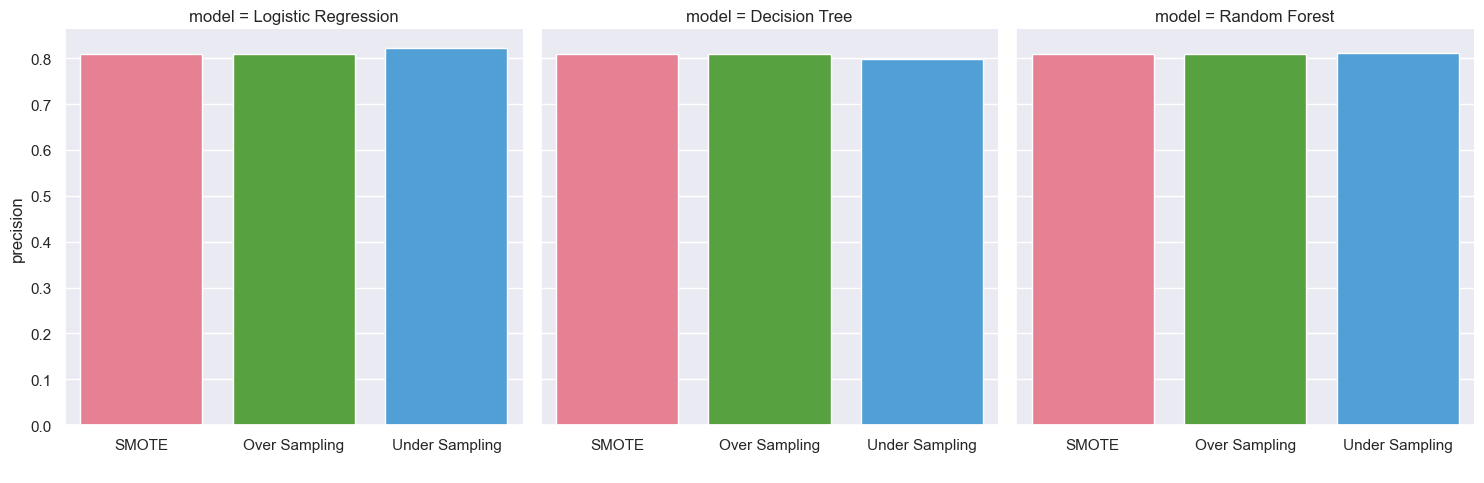

In [818]:
sns.set(font_scale=1)
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot,"resample","precision",palette='husl',order=['SMOTE','Over Sampling','Under Sampling'])
g.set_xlabels(" ")

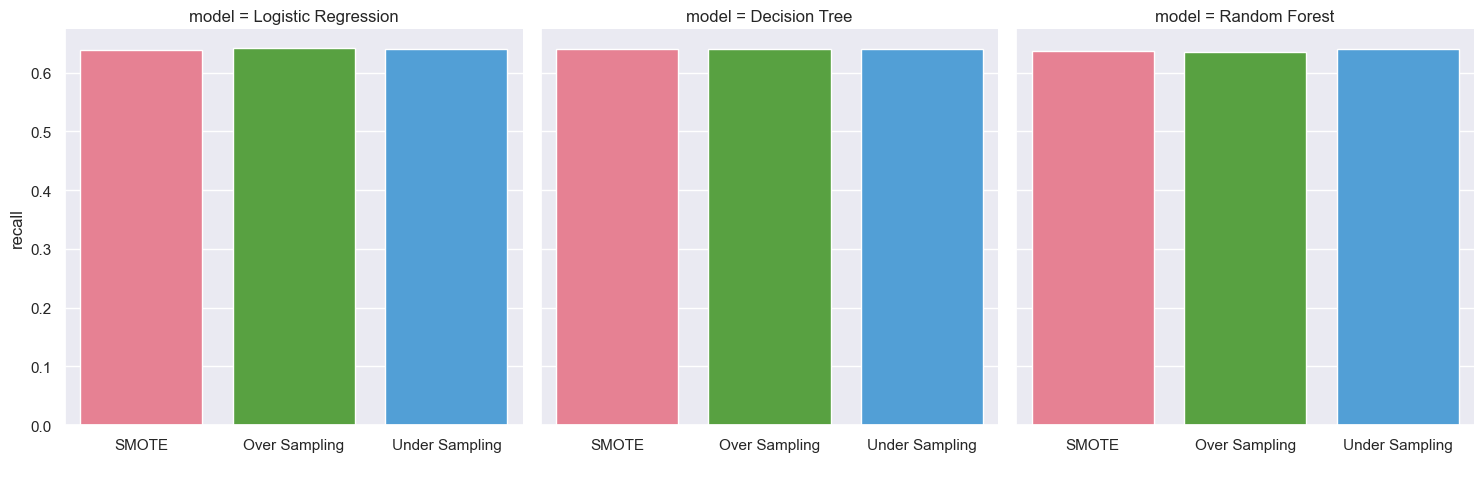

In [819]:
sns.set(font_scale=1)
g = sns.FacetGrid(clf_eval_df,col='model',height=5)
g.map(sns.barplot,"resample","recall",palette='husl',order=['SMOTE','Over Sampling','Under Sampling'])
g.set_xlabels(" ")

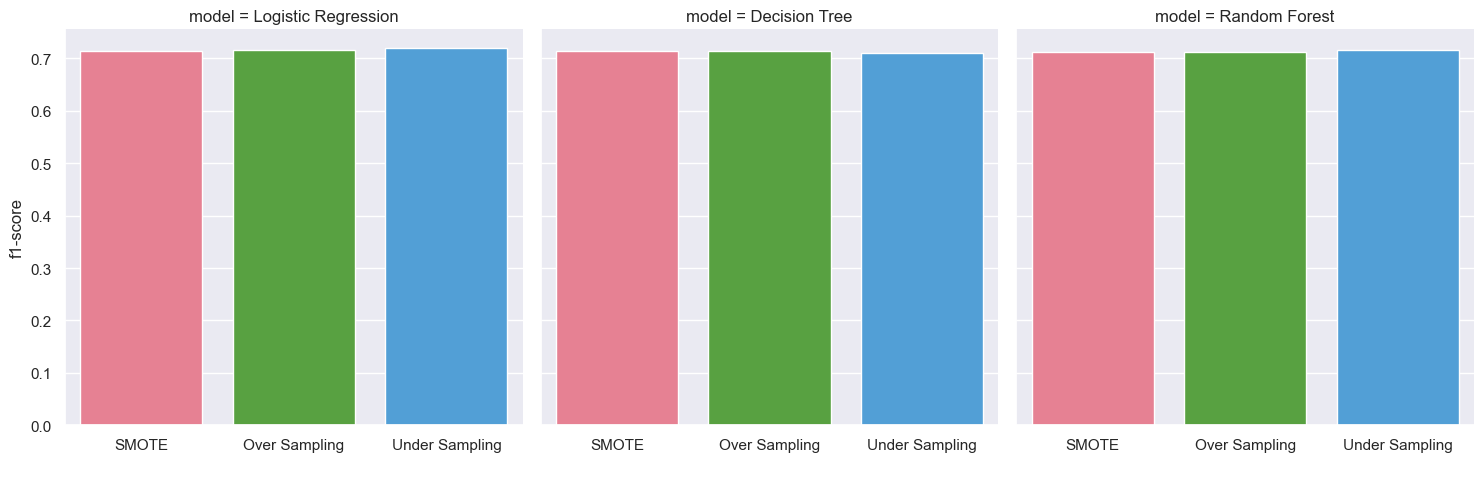

In [820]:
sns.set(font_scale=1)
g = sns.FacetGrid(clf_eval_df,col='model',height=5)
g.map(sns.barplot,"resample","f1-score",palette='husl',order=['SMOTE','Over Sampling','Under Sampling'])
g.set_xlabels(" ")

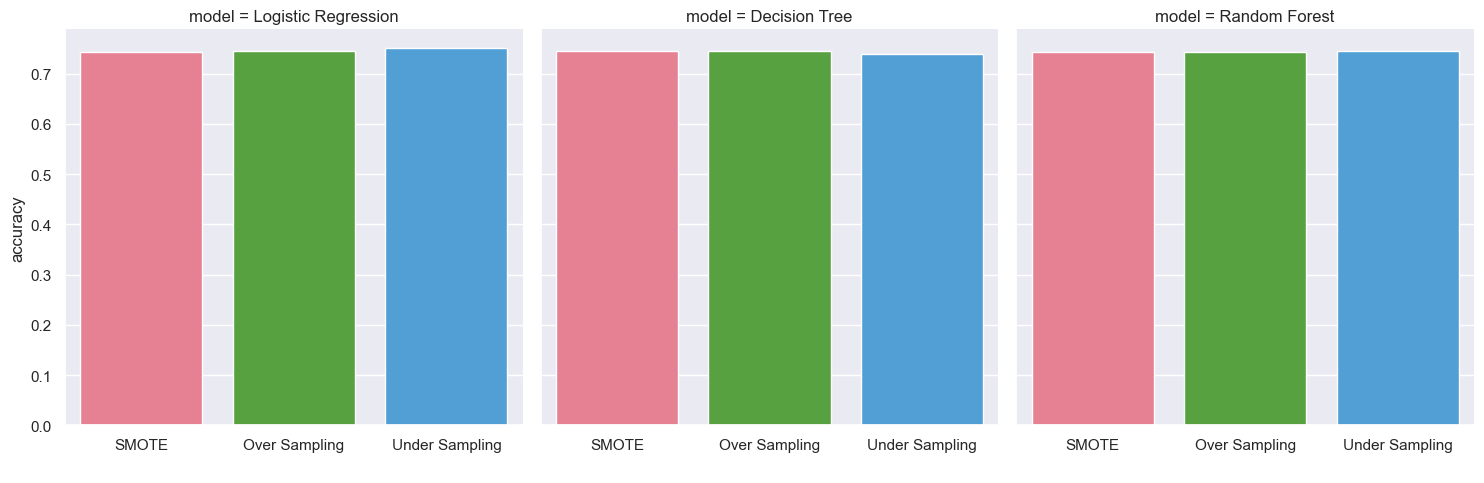

In [821]:
sns.set(font_scale=1)
g = sns.FacetGrid(clf_eval_df,col='model',height=5)
g.map(sns.barplot,"resample","accuracy",palette='husl',order=['SMOTE','Over Sampling','Under Sampling'])
g.set_xlabels(" ")

1. Logistic Regression Performance:
    - Logistic Regression shows reasonably good performance across different resampling techniques.
    - Over Sampling provides a slightly better precision compared to Under Sampling.
    - SMOTE, however, results in significantly good precision
2. Decision Tree Performance:
    - Decision Tree models also perform well, with comparable precision, recall, and F1-score.
    - Over Sampling and Under Sampling show similar performance, while SMOTE has a slightly good precision.
3. Random Forest Performance:
    - Random Forest consistently performs well across different resampling techniques, showing high precision, recall, and F1-score.
    - Under Sampling, Over Sampling, and SMOTE all provide effective improvements in model performance.

Model Selected: 
Random Forest, because with all Under Sampling, Over Sampling, or SMOTE Technique i am getting good responces , appears to be a strong Model for deployment due to its consistent high performance across metrics.

In [822]:
clf_eval_df[clf_eval_df['model']=="Random Forest"]

,model,resample,precision,recall,f1-score,accuracy
6,Random Forest,Under Sampling,0.811800,0.639851,0.715642,0.745757
7,Random Forest,Over Sampling,0.808721,0.636084,0.712089,0.742821
8,Random Forest,SMOTE,0.809090,0.637602,0.713182,0.743580


SMOTE Consideration: While SMOTE improves overall accuracy, it tends to result in lower precision. Consider the potential consequences of false positives and false negatives in the context of COVID prediction. 

### SQL Part 

Find the number of corona patients who faced shortness of breath.

Find the number of negative corona patients who have fever and sore_throat. 

Group the data by month and rank the number of positive cases.

Find the female negative corona patients who faced cough and headache.

How many elderly corona patients have faced breathing problems?

Which three symptoms were more common among COVID positive patients?

Which symptom was less common among COVID negative people?

What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [823]:
## pip install duckdb==0.9.2

In [824]:
import duckdb

In [825]:
con = duckdb.connect()
con.register('df',df)

In [826]:
con.execute('select * from df limit 5').fetchdf()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,false,true,false,false,negative,no,female
1,false,true,false,false,false,positive,no,female
2,false,true,false,false,false,positive,no,female
3,true,false,false,false,false,negative,no,female
4,true,false,false,false,false,negative,no,female


In [827]:
for i in df:
    print(i,df[i].unique())

Cough_symptoms ['true' 'false']
Fever ['false' 'true']
Sore_throat ['true' 'false']
Shortness_of_breath ['false' 'true']
Headache ['false' 'true']
Corona ['negative' 'positive' 'other']
Age_60_above ['no' 'yes']
Sex ['female' 'male']


In [828]:
def sql_fun(query):

    sql = con.execute(query).fetchdf()
    return sql

In [829]:
# Find the number of corona patients who faced shortness of breath.

sql_fun("select count(Shortness_of_breath) as faced_shortness_breath from df where Shortness_of_breath='true'")

,faced_shortness_breath
0,1577


In [830]:
df['Shortness_of_breath'].value_counts()

false    277271
true       1577
Name: Shortness_of_breath, dtype: int64

In [831]:
sql_fun("select * from df where Corona = 'negative'")

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,false,true,false,false,negative,no,female
1,true,false,false,false,false,negative,no,female
2,true,false,false,false,false,negative,no,female
3,false,false,false,false,false,negative,no,female
4,false,true,false,false,false,negative,no,female
...,...,...,...,...,...,...,...,...
260222,false,false,false,false,false,negative,no,male
260223,false,false,false,false,false,negative,no,female
260224,false,false,false,false,false,negative,no,male
260225,false,false,false,false,false,negative,no,male


In [832]:
# Find the number of negative corona patients who have fever and sore_throat. 
sql_fun("with CTE as (select * from df where Corona = 'negative')select count(Corona) as countNegative from CTE where Fever = 'true' and Sore_throat = 'true'")

,countNegative
0,121


In [835]:
data['Test_date'] = pd.to_datetime(data['Test_date'],format ='%d-%m-%Y')

In [836]:
# Group the data by month and rank the number of positive cases.
sql_fun("select monthname(Test_date) as month , count(*) as Num_positive_per_month from data where Corona = 'positive' group by month order by Num_positive_per_month desc")

,month,Num_positive_per_month
0,April,8881
1,March,5848


In [837]:
# Find the female negative corona patients who faced cough and headache.
sql_fun("with CTE as (select * from df where Corona = 'negative' and Sex = 'female') select * from CTE where Cough_symptoms = 'true' and Headache ='true'")

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,true,true,false,false,true,negative,no,female
1,true,true,false,false,true,negative,no,female
2,true,false,false,false,true,negative,no,female
3,true,true,true,false,true,negative,no,female
4,true,false,false,false,true,negative,no,female
5,true,true,false,false,true,negative,no,female
6,true,false,true,false,true,negative,no,female
7,true,false,false,false,true,negative,no,female
8,true,false,true,false,true,negative,no,female
9,true,false,false,false,true,negative,no,female


In [838]:
# How many elderly corona patients have faced breathing problems?
sql_fun("select count(*) as old_patients_breathing_problem from df where Age_60_above = 'yes' and Shortness_of_breath = 'true'")

,old_patients_breathing_problem
0,292


In [839]:
df.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex'],
      dtype='object')

In [840]:
# Which three symptoms were more common among COVID positive patients?
result = sql_fun(""" with CTE as 
            (select * from df where Corona ='positive') 
                select count(*) from CTE where Cough_symptoms ='true' group by Cough_symptoms 
                UNION ALL select count(*) from CTE where Fever ='true' group by Fever
                UNION ALL select count(*) from CTE where Sore_throat ='true' group by Sore_throat
                UNION ALL select count(*) from CTE where Shortness_of_breath ='true' group by Shortness_of_breath
                UNION ALL select count(*) from CTE where Headache ='true' group by Headache""")

In [841]:
val = pd.DataFrame(result.values,columns=['Count_symptoms'])

In [842]:
column = pd.DataFrame(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],columns=['symptoms'])

In [843]:
three_symptoms = pd.concat([column,val],axis=1)

In [844]:
sql_fun("select * from three_symptoms order by Count_symptoms desc limit 3")

,symptoms,Count_symptoms
0,Cough_symptoms,6584
1,Headache,5559
2,Fever,2235


In [845]:
# Which symptom was less common among COVID negative people?
result = sql_fun(""" with CTE as 
            (select * from df where Corona = 'negative')
                select count(*) from CTE where Cough_symptoms = 'false' group by Cough_symptoms
                UNION ALL select count(*) from CTE where Fever ='false' group by Fever
                UNION ALL select count(*) from CTE where Sore_throat ='false' group by Sore_throat
                UNION ALL select count(*) from CTE where Shortness_of_breath ='false' group by Shortness_of_breath
                UNION ALL select count(*) from CTE where Headache ='false' group by Headache
        """)

In [846]:
val =  pd.DataFrame(result.values,columns=['Count_symptoms'])

In [847]:
three_symptoms = pd.concat([column,val],axis=1)

In [848]:
sql_fun("select * from three_symptoms order by Count_symptoms limit 3")

,symptoms,Count_symptoms
0,Cough_symptoms,225240
1,Headache,244411
2,Sore_throat,259842


In [849]:
# What are the most common symptoms among COVID positive males whose known contact was abroad? 
sql_fun("select * from data").head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [850]:
newdf = data.iloc[:,2:]

In [851]:
newdf.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [852]:
for i in newdf.columns:
    print(i,":",newdf[i].unique())

Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Corona : ['negative' 'positive' 'other']
Age_60_above : ['None' 'No' 'Yes']
Sex : ['None' 'male' 'female']
Known_contact : ['Abroad' 'Contact with confirmed' 'Other']


In [853]:
classify = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex']

In [854]:
columns_to_classify = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Sex','Age_60_above']
for i in df:
    if i in columns_to_classify:
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: x.lower() if isinstance(x, str) else x)
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: 'true' if x==True else x)
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: 'false' if x==False else x)
        df[columns_to_classify] = df[columns_to_classify].applymap(lambda x: np.nan if x=='none' else x)

In [855]:
for i in newdf:
    if i in classify:
        newdf[classify] = newdf[classify].applymap(lambda x: x.lower() if isinstance (x,str) else x)
        newdf[classify] = newdf[classify].applymap(lambda x: 'false' if x == False else x)
        newdf[classify] = newdf[classify].applymap(lambda x: 'true' if x == True else x)

In [856]:
newdf['Cough_symptoms']=newdf['Cough_symptoms'].replace('none',newdf['Cough_symptoms'].mode()[0])
newdf['Fever']=newdf['Fever'].replace('none',newdf['Fever'].mode()[0])
newdf['Sore_throat']=newdf['Sore_throat'].replace('none',newdf['Sore_throat'].mode()[0])
newdf['Shortness_of_breath']=newdf['Shortness_of_breath'].replace('none',newdf['Shortness_of_breath'].mode()[0])
newdf['Headache']=newdf['Headache'].replace('none',newdf['Headache'].mode()[0])
newdf['Sex']=newdf['Sex'].replace('none',newdf['Sex'].mode()[0])
newdf['Age_60_above']=newdf['Age_60_above'].replace('none',newdf['Age_60_above'].mode()[0])

In [857]:
for i in newdf.columns:
    print(i,":",newdf[i].unique())

Cough_symptoms : ['true' 'false']
Fever : ['false' 'true']
Sore_throat : ['true' 'false']
Shortness_of_breath : ['false' 'true']
Headache : ['false' 'true']
Corona : ['negative' 'positive' 'other']
Age_60_above : ['none' 'no' 'yes']
Sex : ['female' 'male']
Known_contact : ['Abroad' 'Contact with confirmed' 'Other']


In [858]:
# What are the most common symptoms among COVID positive males whose known contact was abroad? 

result = sql_fun("""With CTE as
        (select * from newdf where Corona = 'positive' and Sex = 'male' and Known_contact = 'Abroad')
                select count(*) from CTE where Cough_symptoms = 'true' group by Cough_symptoms
                        UNION ALL select count(*) from CTE where Fever ='true' group by Fever
                        UNION ALL select count(*) from CTE where Sore_throat ='true' group by Sore_throat
                        UNION ALL select count(*) from CTE where Shortness_of_breath ='true' group by Shortness_of_breath
                        UNION ALL select count(*) from CTE where Headache ='true' group by Headache""")

In [859]:
val = pd.DataFrame(result.values,columns=['Count_symptoms'])

In [860]:
three_symptoms = pd.concat([column,val],axis=1)

In [861]:
sql_fun("select * from three_symptoms order by Count_symptoms desc limit 3")

,symptoms,Count_symptoms
0,Cough_symptoms,532
1,Headache,407
2,Fever,129
